In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '120Ds9CHQ3mdNh_rn9Z899P0j0EHB9ol_'})
download.GetContentFile('genimages.zip')
!unzip genimages.zip

Archive:  genimages.zip
   creating: genresImages/
   creating: genresImages/blues/
  inflating: genresImages/blues/blues00000.png.png  
  inflating: genresImages/blues/blues00001.png  
  inflating: genresImages/blues/blues00002.png  
  inflating: genresImages/blues/blues00003.png.png  
  inflating: genresImages/blues/blues00004.png  
  inflating: genresImages/blues/blues00005.png  
  inflating: genresImages/blues/blues00006.png  
  inflating: genresImages/blues/blues00007.png  
  inflating: genresImages/blues/blues00008.png  
  inflating: genresImages/blues/blues00009.png  
  inflating: genresImages/blues/blues00010.png  
  inflating: genresImages/blues/blues00011.png  
  inflating: genresImages/blues/blues00012.png  
  inflating: genresImages/blues/blues00013.png  
  inflating: genresImages/blues/blues00014.png  
  inflating: genresImages/blues/blues00015.png  
  inflating: genresImages/blues/blues00016.png  
  inflating: genresImages/blues/blues00017.png  
  inflating: genresImages/

In [ ]:
import os
import numpy as np
import glob
import shutil
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils


In [ ]:
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
labels = [i for i in range(10)]

In [ ]:
base_dir = 'genresImages/'

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.png')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

blues: 100 Images
classical: 100 Images
country: 100 Images
disco: 100 Images
hiphop: 100 Images
jazz: 100 Images
metal: 100 Images
pop: 100 Images
reggae: 100 Images
rock: 100 Images


In [ ]:
round(len(images)*0.8)

80

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
batch_size = 128
IMG_SHAPE = 150

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
#model.add(MaxPooling2D())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(MaxPooling2D())



model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
direct = [train_dir + '/' + p + '/' for p in os.listdir(train_dir)]
direct 

['genresImages/train/blues/',
 'genresImages/train/reggae/',
 'genresImages/train/hiphop/',
 'genresImages/train/disco/',
 'genresImages/train/metal/',
 'genresImages/train/country/',
 'genresImages/train/classical/',
 'genresImages/train/pop/',
 'genresImages/train/jazz/',
 'genresImages/train/rock/']

In [ ]:
import cv2
img_data_list = []
label_train_data = []
for p in direct:
  label = p.split('/')[2]
  index = classes.index(label)
  for img in os.listdir(p):
    label_train_data.append(index)
    input_img = cv2.imread(p + '/' + img)
    input_img_resize = cv2.resize(input_img, (IMG_SHAPE, IMG_SHAPE))
    img_data_list.append(input_img_resize)


In [ ]:
len(label_train_data)

800

In [ ]:
train_data = np.array(img_data_list)
train_data = train_data.astype('float32')
train_data = train_data / 255
train_data.shape

(800, 150, 150, 3)

In [ ]:
direct_val = [val_dir + '/' + p + '/' for p in os.listdir(val_dir)]
direct_val

['genresImages/val/blues/',
 'genresImages/val/reggae/',
 'genresImages/val/hiphop/',
 'genresImages/val/disco/',
 'genresImages/val/metal/',
 'genresImages/val/country/',
 'genresImages/val/classical/',
 'genresImages/val/pop/',
 'genresImages/val/jazz/',
 'genresImages/val/rock/']

In [ ]:
img_data_list = []
label_val_data = []
for p in direct_val:
  label = p.split('/')[2]
  index = classes.index(label)
  for img in os.listdir(p):
    label_val_data.append(index)
    input_img = cv2.imread(p + '/' + img)
    input_img_resize = cv2.resize(input_img, (IMG_SHAPE, IMG_SHAPE))
    img_data_list.append(input_img_resize)

In [ ]:
val_data = np.array(img_data_list)
val_data = val_data.astype('float32')
val_data = val_data / 255
val_data.shape

(200, 150, 150, 3)

In [ ]:
len(label_val_data)

200

In [ ]:
cat_train_data = utils.to_categorical(label_train_data, 10)
cat_val_data = utils.to_categorical(label_val_data, 10)
cat_train_data.shape

(800, 10)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_data, cat_train_data, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = (train_data, val_data, cat_train_data, cat_val_data)

In [ ]:
print(len(X_test))

200


In [ ]:
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
'''history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)'''

Epoch 1/100
25/25 [==============================] - 19s 769ms/step - loss: 2.3733 - accuracy: 0.0975 - val_loss: 2.2901 - val_accuracy: 0.0850
Epoch 2/100
25/25 [==============================] - 19s 759ms/step - loss: 2.2665 - accuracy: 0.1325 - val_loss: 2.2228 - val_accuracy: 0.1550
Epoch 3/100
25/25 [==============================] - 19s 758ms/step - loss: 2.2271 - accuracy: 0.1450 - val_loss: 2.1875 - val_accuracy: 0.1600
Epoch 4/100
25/25 [==============================] - 19s 759ms/step - loss: 2.1615 - accuracy: 0.2013 - val_loss: 2.1547 - val_accuracy: 0.2000
Epoch 5/100
25/25 [==============================] - 19s 756ms/step - loss: 2.1160 - accuracy: 0.1825 - val_loss: 2.0869 - val_accuracy: 0.1550
Epoch 6/100
25/25 [==============================] - 19s 757ms/step - loss: 2.0986 - accuracy: 0.2000 - val_loss: 2.0700 - val_accuracy: 0.2150
Epoch 7/100
25/25 [==============================] - 19s 763ms/step - loss: 2.1023 - accuracy: 0.1850 - val_loss: 2.0721 - val_accuracy:

'history = model.fit_generator(\n    train_data_gen,\n    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),\n    epochs=epochs,\n    validation_data=val_data_gen,\n    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))\n)'

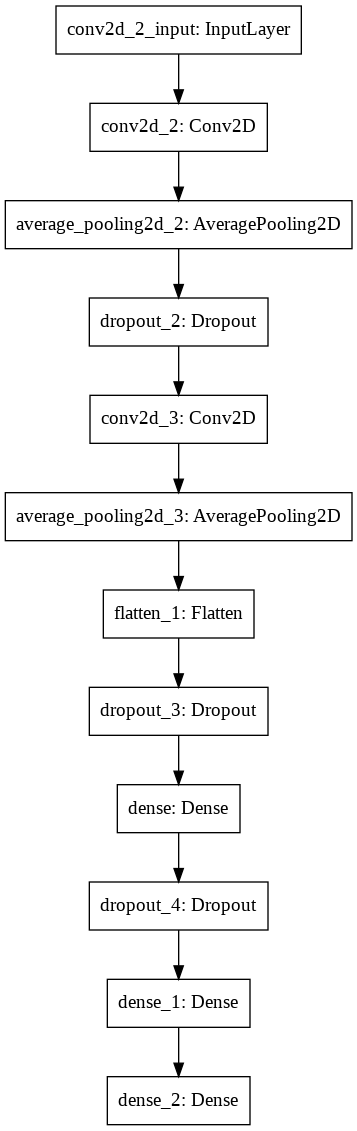

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

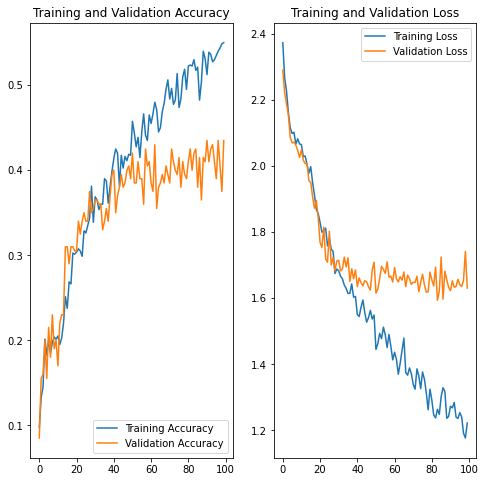

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
file_name = []
for p in direct_val:
  for img in os.listdir(p):
    file_name.append(img)

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 9, 5, 5, 6, 3, 9, 5, 9, 5, 9, 2, 3, 0, 0, 9, 8, 9, 0, 0, 8, 8,
       5, 8, 2, 2, 5, 3, 8, 5, 8, 8, 8, 4, 8, 8, 8, 7, 3, 4, 8, 8, 9, 4,
       8, 5, 0, 4, 6, 3, 9, 8, 8, 5, 2, 7, 4, 4, 3, 4, 9, 3, 0, 0, 7, 8,
       2, 4, 3, 8, 9, 3, 5, 9, 8, 3, 8, 5, 7, 4, 6, 6, 6, 9, 3, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 4, 7, 7, 7, 5, 8, 8, 9, 2, 2,
       2, 9, 3, 2, 1, 2, 9, 5, 2, 0, 8, 1, 5, 1, 1, 1, 1, 5, 2, 2, 5, 1,
       2, 1, 1, 5, 1, 5, 1, 1, 7, 7, 7, 5, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 5, 5, 8, 5, 2, 5, 8, 2, 5, 7, 5, 2, 5, 2, 5, 5,
       0, 2, 4, 1, 9, 2, 9, 0, 0, 7, 6, 6, 7, 9, 7, 4, 2, 7, 0, 4, 9, 6,
       5, 5])

In [ ]:
predicted_class = []
for i in y_pred:
  predicted_class.append(i)
type(predicted_class)

list

In [ ]:
print(len(predicted_class), len(file_name), len(label_val_data))

200 200 200


In [ ]:
dict = {'file_name': file_name, 'actual_class': label_val_data, 'predicted_class': predicted_class}
    
df = pd.DataFrame(dict)
df.head(50)

,file_name,actual_class,predicted_class
0,blues00004.png,0,5
1,blues00070.png,0,9
2,blues00001.png,0,5
3,blues00011.png,0,5
4,blues00061.png,0,6
5,blues00043.png,0,3
6,blues00050.png,0,9
7,blues00019.png,0,5
8,blues00099.png,0,9
9,blues00026.png,0,5
